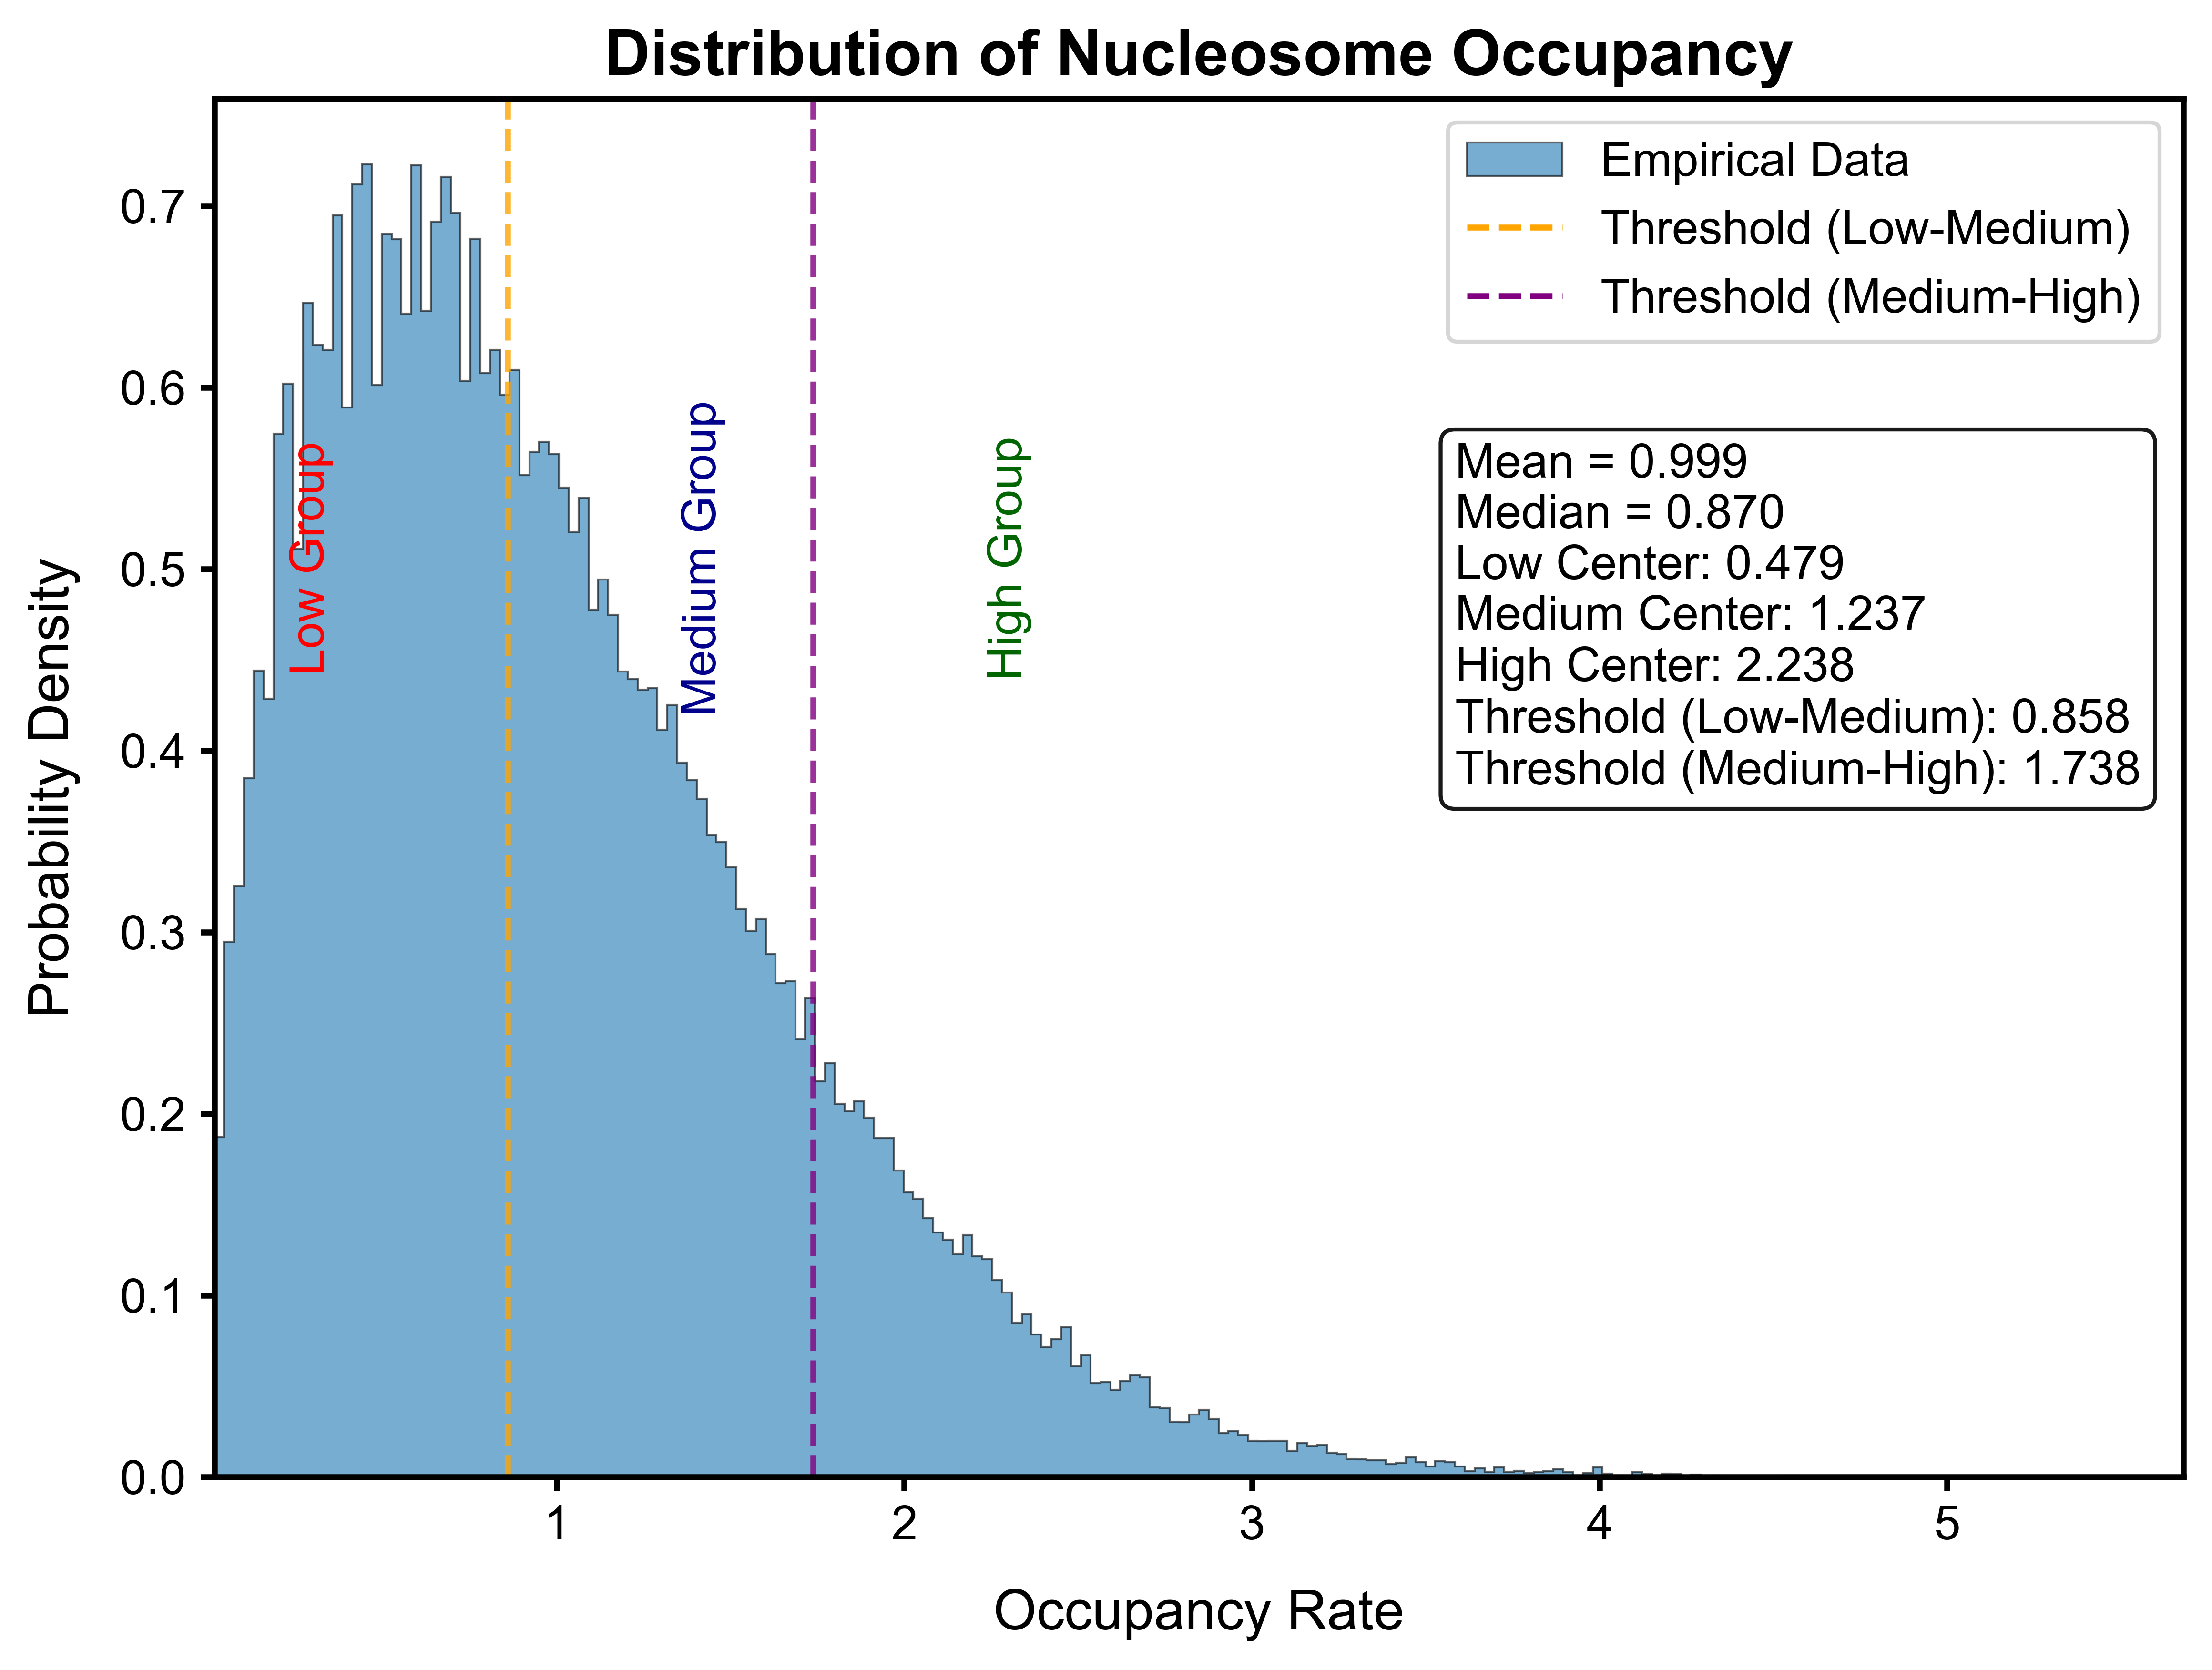

-------------- Statistical Summary ---------------
Total data points: 107,745
Mean ± SD: 0.9986 ± 0.6625
Median: 0.8701

----------- Classification Thresholds ------------
Low Group Center: 0.4787
Medium Group Center: 1.2375
High Group Center: 2.2378

----------- Classification Thresholds ------------
Threshold between Low and Medium Group: 0.8581
Threshold between Medium and High Group: 1.7377

--------------- Group Data Counts ----------------
Low Group: 53,178 (49.36%)
Medium Group: 39,744 (36.89%)
High Group: 14,823 (13.76%)


In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set global plotting parameters
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.dpi': 600,
    'figure.figsize': (8, 6),
    'savefig.format': 'pdf',
    'axes.linewidth': 1.5,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5})

# Import data
fs = h5py.File('Nucleosome Digital Matrix/Digital Matrix.h5', 'r') 
level = fs['label']    
data = np.array(level, dtype=np.float64) 

# Statistical analysis
mean = np.mean(data)
std_dev = np.std(data)
median = np.median(data)

# Use K-Means clustering to classify into low, medium, and high groups
kmeans = KMeans(n_clusters=3, random_state=0)
data_2d = data.reshape(-1, 1)
kmeans.fit(data_2d)
labels = kmeans.labels_

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_.flatten()
low_center = cluster_centers.min()
high_center = cluster_centers.max()
medium_center = cluster_centers[(cluster_centers != low_center) & (cluster_centers != high_center)][0]

# Calculate the thresholds
threshold_low_medium = (low_center + medium_center) / 2
threshold_medium_high = (medium_center + high_center) / 2

# Classify the data
low_data = data[data <= threshold_low_medium]
medium_data = data[(data > threshold_low_medium) & (data <= threshold_medium_high)]
high_data = data[data > threshold_medium_high]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram
n, bins, patches = ax.hist(data, 
                          bins=200, 
                          density=True,
                          histtype='stepfilled',
                          color='#1f77b4',
                          alpha=0.6,
                          edgecolor='black',
                          linewidth=0.5,
                          label='Empirical Data')

# Add threshold lines and annotations
ax.axvline(threshold_low_medium, color='orange', linestyle='--', linewidth=1.5, alpha=0.8)
ax.axvline(threshold_medium_high, color='purple', linestyle='--', linewidth=1.5, alpha=0.8)

# Add group annotations
ax.text(threshold_low_medium + 0.5, np.max(n) * 0.7, 'Medium Group', 
        ha='left', va='center', rotation=90, color='darkblue')
ax.text(threshold_medium_high + 0.5, np.max(n) * 0.7, 'High Group', 
        ha='left', va='center', rotation=90, color='darkgreen')
ax.text(threshold_low_medium - 0.5, np.max(n) * 0.7, 'Low Group', 
        ha='right', va='center', rotation=90, color='red')

# Set axis labels and title
ax.set_title('Distribution of Nucleosome Occupancy', fontweight='bold')
ax.set_xlabel('Occupancy Rate', labelpad=10)
ax.set_ylabel('Probability Density', labelpad=10)
ax.set_xlim(np.min(data), np.max(data))
ax.set_ylim(0, None)

# Add statistical information text box
stats_text = f'Mean = {mean:.3f}\nMedian = {median:.3f}\n'
stats_text += f'Low Center: {low_center:.3f}\n'
stats_text += f'Medium Center: {medium_center:.3f}\n'
stats_text += f'High Center: {high_center:.3f}\n'
stats_text += f'Threshold (Low-Medium): {threshold_low_medium:.3f}\n'
stats_text += f'Threshold (Medium-High): {threshold_medium_high:.3f}'
ax.text(0.63, 0.75, stats_text,
        transform=ax.transAxes,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# Optimize legend
handles, labels = ax.get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='orange', linestyle='--', linewidth=1.5))
handles.append(plt.Line2D([0], [0], color='purple', linestyle='--', linewidth=1.5))
labels.append('Threshold (Low-Medium)')
labels.append('Threshold (Medium-High)')
ax.legend(handles, labels, loc='upper right', frameon=True)

# Turn off grid lines
ax.grid(False)

# Save the figure
plt.tight_layout()
plt.savefig('Visualization Charts/nucleosome_occupancy_distribution_kmeans.png', bbox_inches='tight')
plt.show()
plt.close()

# Print detailed statistical information
print(f"{' Statistical Summary ':-^50}")
print(f"Total data points: {len(data):,}")
print(f"Mean ± SD: {mean:.4f} ± {std_dev:.4f}")
print(f"Median: {median:.4f}")

print(f"\n{' Classification Thresholds ':-^50}")
print(f"Low Group Center: {low_center:.4f}")
print(f"Medium Group Center: {medium_center:.4f}")
print(f"High Group Center: {high_center:.4f}")

print(f"\n{' Classification Thresholds ':-^50}")
print(f"Threshold between Low and Medium Group: {threshold_low_medium:.4f}")
print(f"Threshold between Medium and High Group: {threshold_medium_high:.4f}")

print(f"\n{' Group Data Counts ':-^50}")
print(f"Low Group: {len(low_data):,} ({len(low_data)/len(data)*100:.2f}%)")
print(f"Medium Group: {len(medium_data):,} ({len(medium_data)/len(data)*100:.2f}%)")
print(f"High Group: {len(high_data):,} ({len(high_data)/len(data)*100:.2f}%)")

In [2]:
import h5py
import numpy as np

# Define classification thresholds
threshold_low_medium = 0.8581
threshold_medium_high = 1.7377

# Open the HDF5 file
with h5py.File('Nucleosome Digital Matrix/Digital Matrix.h5', 'r') as fs:
    # Get the nucleosome occupancy data
    label = fs['label'][:]
    # Get the digital matrix data
    nuar = fs['Nuar'][:]

    # Classify samples based on thresholds
    low_indices = np.where(label <= threshold_low_medium)[0]
    medium_indices = np.where((label > threshold_low_medium) & (label <= threshold_medium_high))[0]
    high_indices = np.where(label > threshold_medium_high)[0]

    # Extract the digital matrix and nucleosome occupancy for each group
    low_group_nuar = nuar[low_indices]
    low_group_label = label[low_indices]

    medium_group_nuar = nuar[medium_indices]
    medium_group_label = label[medium_indices]

    high_group_nuar = nuar[high_indices]
    high_group_label = label[high_indices]

    # Save each group's data to a new HDF5 file
    # Save the low occupancy group
    with h5py.File('Nucleosome Digital Matrix/Low_Occupancy_Group.h5', 'w') as low_file:
        low_file.create_dataset('Nuar', data=low_group_nuar)
        low_file.create_dataset('label', data=low_group_label)

    # Save the medium occupancy group
    with h5py.File('Nucleosome Digital Matrix/Medium_Occupancy_Group.h5', 'w') as medium_file:
        medium_file.create_dataset('Nuar', data=medium_group_nuar)
        medium_file.create_dataset('label', data=medium_group_label)

    # Save the high occupancy group
    with h5py.File('Nucleosome Digital Matrix/High_Occupancy_Group.h5', 'w') as high_file:
        high_file.create_dataset('Nuar', data=high_group_nuar)
        high_file.create_dataset('label', data=high_group_label)

# Define a function to print the shape of datasets in an HDF5 file
def print_dataset_shape(file_path):
    with h5py.File(file_path, 'r') as f:
        nuar = f['Nuar']
        label = f['label']
        print(f"{file_path}")
        print(f"Nuar shape: {nuar.shape}")
        print(f"label shape: {label.shape}")
        print()

# Print the shape of datasets in each group's HDF5 file
print_dataset_shape('Nucleosome Digital Matrix/Low_Occupancy_Group.h5')
print_dataset_shape('Nucleosome Digital Matrix/Medium_Occupancy_Group.h5')
print_dataset_shape('Nucleosome Digital Matrix/High_Occupancy_Group.h5')

Nucleosome Digital Matrix/Low_Occupancy_Group.h5
Nuar shape: (53178, 16, 146)
label shape: (53178,)

Nucleosome Digital Matrix/Medium_Occupancy_Group.h5
Nuar shape: (39744, 16, 146)
label shape: (39744,)

Nucleosome Digital Matrix/High_Occupancy_Group.h5
Nuar shape: (14823, 16, 146)
label shape: (14823,)



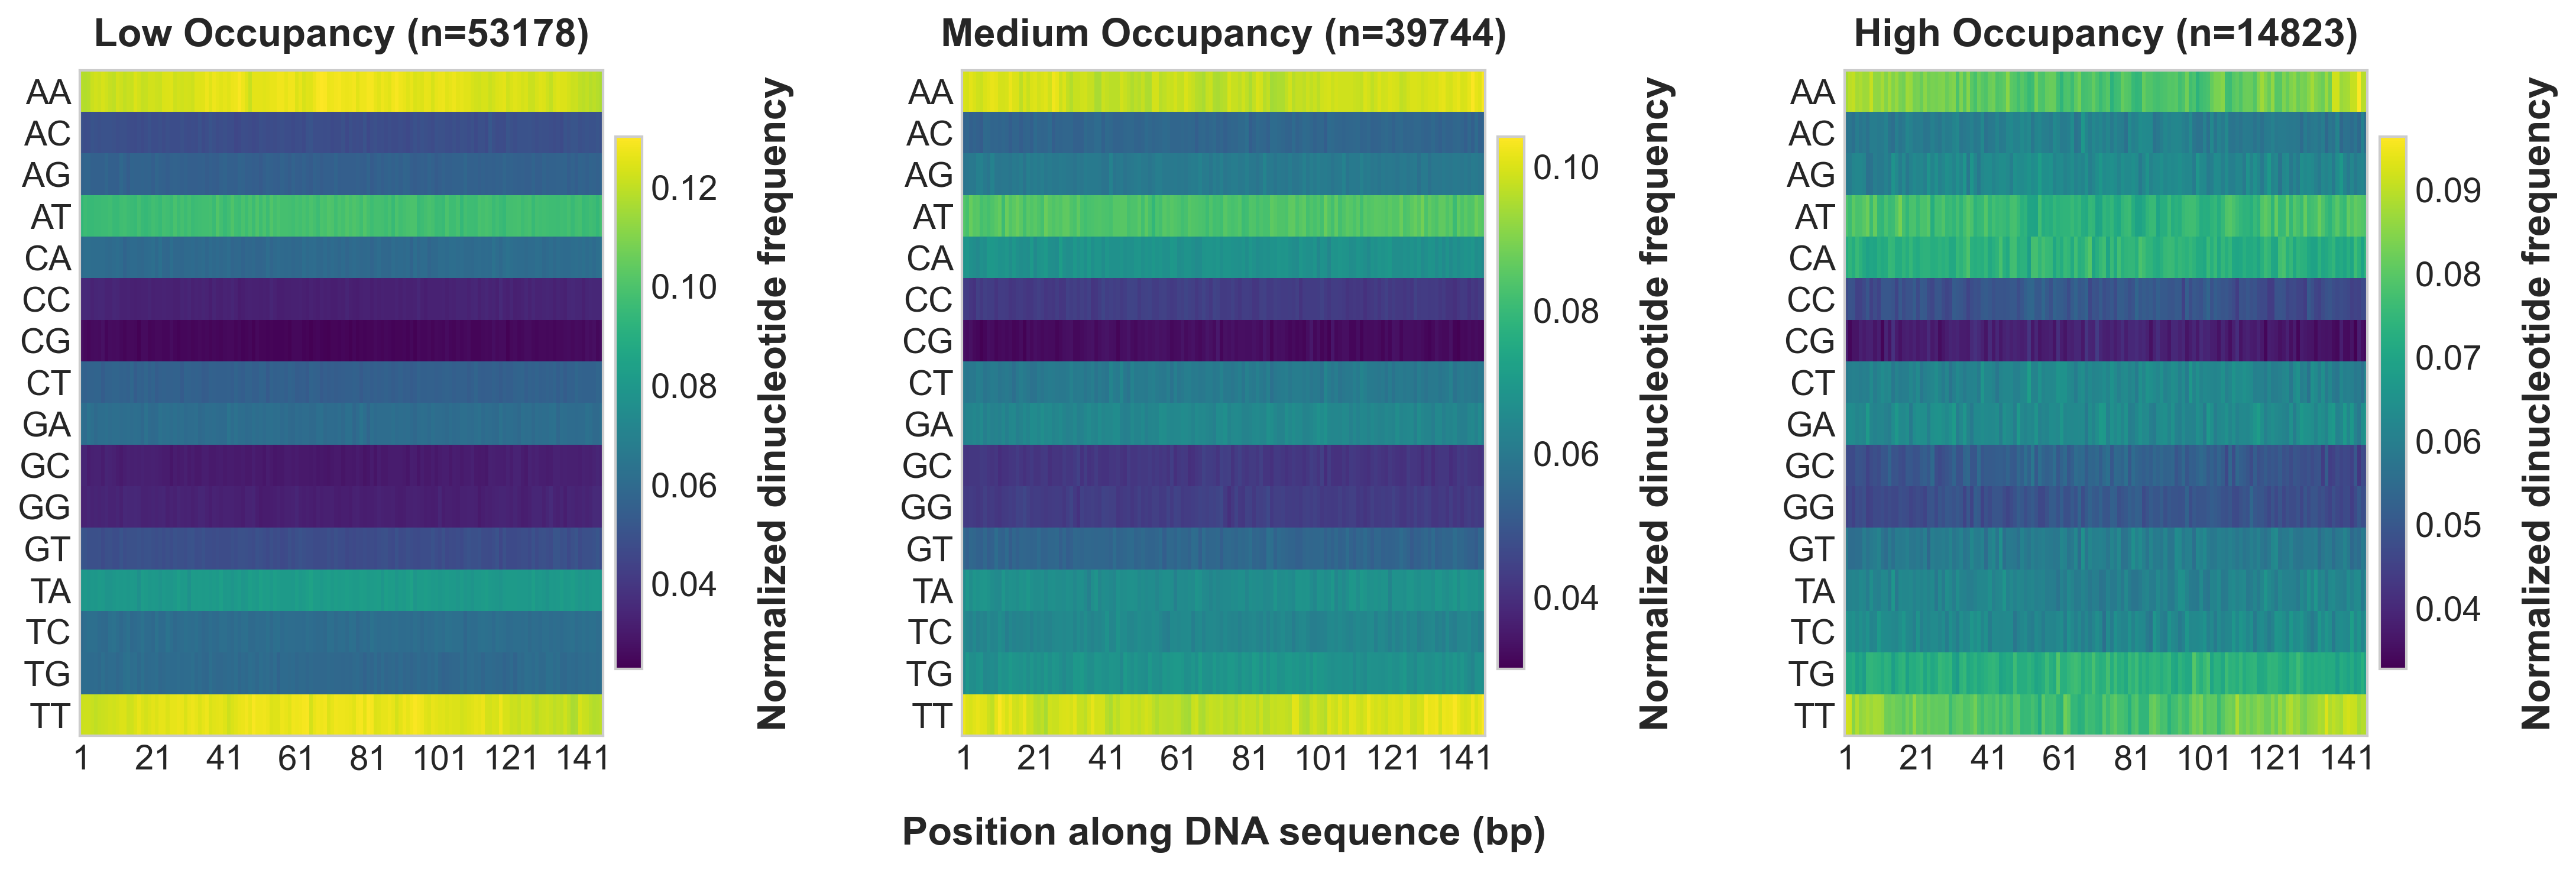

In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# 0. Set plotting parameters for journal publication
# ==========================
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': 'Arial',
    'font.size': 18,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.format': 'pdf',
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1,
    'figure.constrained_layout.use': False})

# ==========================
# 1. Data loading and processing
# ==========================
def load_h5_data(file_path):
    with h5py.File(file_path, 'r') as f:
        matrices = f['Nuar'][:]
    return matrices

# Load data for the three groups
low_file = "Nucleosome Digital Matrix/Low_Occupancy_Group.h5"
medium_file = "Nucleosome Digital Matrix/Medium_Occupancy_Group.h5"
high_file = "Nucleosome Digital Matrix/High_Occupancy_Group.h5"

low_matrices = load_h5_data(low_file)
medium_matrices = load_h5_data(medium_file)
high_matrices = load_h5_data(high_file)

# Calculate the average matrix for each group
low_average = np.mean(low_matrices, axis=0)
medium_average = np.mean(medium_matrices, axis=0)
high_average = np.mean(high_matrices, axis=0)

# ==========================
# 2. Visualization and saving
# ==========================
dinucleotides = ['AA', 'AC', 'AG', 'AT', 'CA', 'CC', 'CG', 'CT',
                 'GA', 'GC', 'GG', 'GT', 'TA', 'TC', 'TG', 'TT']
positions = np.arange(1, 147)

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot heatmap for the low occupancy group
im0 = axs[0].imshow(low_average, cmap='viridis', aspect='auto')
axs[0].set_xticks(np.arange(0, 146, 20))
axs[0].set_xticklabels(np.arange(1, 147, 20))
axs[0].set_yticks(range(16))
axs[0].set_yticklabels(dinucleotides)
axs[0].set_title(f"Low Occupancy (n={low_matrices.shape[0]})", fontweight='bold', pad=10)
axs[0].grid(False)

# Add colorbar for the low occupancy heatmap
cbar0 = fig.colorbar(im0, ax=axs[0], orientation='vertical', shrink=0.8, aspect=20, pad=0.02)
cbar0.set_label('Normalized dinucleotide frequency', fontweight='bold', labelpad=16)

# Plot heatmap for the medium occupancy group
im1 = axs[1].imshow(medium_average, cmap='viridis', aspect='auto')
axs[1].set_xticks(np.arange(0, 146, 20))
axs[1].set_xticklabels(np.arange(1, 147, 20))
axs[1].set_yticks(range(16))
axs[1].set_yticklabels(dinucleotides)
axs[1].set_title(f"Medium Occupancy (n={medium_matrices.shape[0]})", fontweight='bold', pad=10)
axs[1].grid(False)
axs[1].set_xlabel("Position along DNA sequence (bp)", fontweight='bold', labelpad=16)

# Add colorbar for the medium occupancy heatmap
cbar1 = fig.colorbar(im1, ax=axs[1], orientation='vertical', shrink=0.8, aspect=20, pad=0.02)
cbar1.set_label('Normalized dinucleotide frequency', fontweight='bold', labelpad=16)

# Plot heatmap for the high occupancy group
im2 = axs[2].imshow(high_average, cmap='viridis', aspect='auto')
axs[2].set_xticks(np.arange(0, 146, 20))
axs[2].set_xticklabels(np.arange(1, 147, 20))
axs[2].set_yticks(range(16))
axs[2].set_yticklabels(dinucleotides)
axs[2].set_title(f"High Occupancy (n={high_matrices.shape[0]})", fontweight='bold', pad=10)
axs[2].grid(False)

# Add colorbar for the high occupancy heatmap
cbar2 = fig.colorbar(im2, ax=axs[2], orientation='vertical', shrink=0.8, aspect=20, pad=0.02)
cbar2.set_label('Normalized dinucleotide frequency', fontweight='bold', labelpad=16)

# Manually adjust layout
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.15, top=0.9, wspace=0.4)

# Save the figure
plt.savefig("Visualization Charts/all_occupancy_distribution_heatmaps.png", dpi=300)
plt.show()

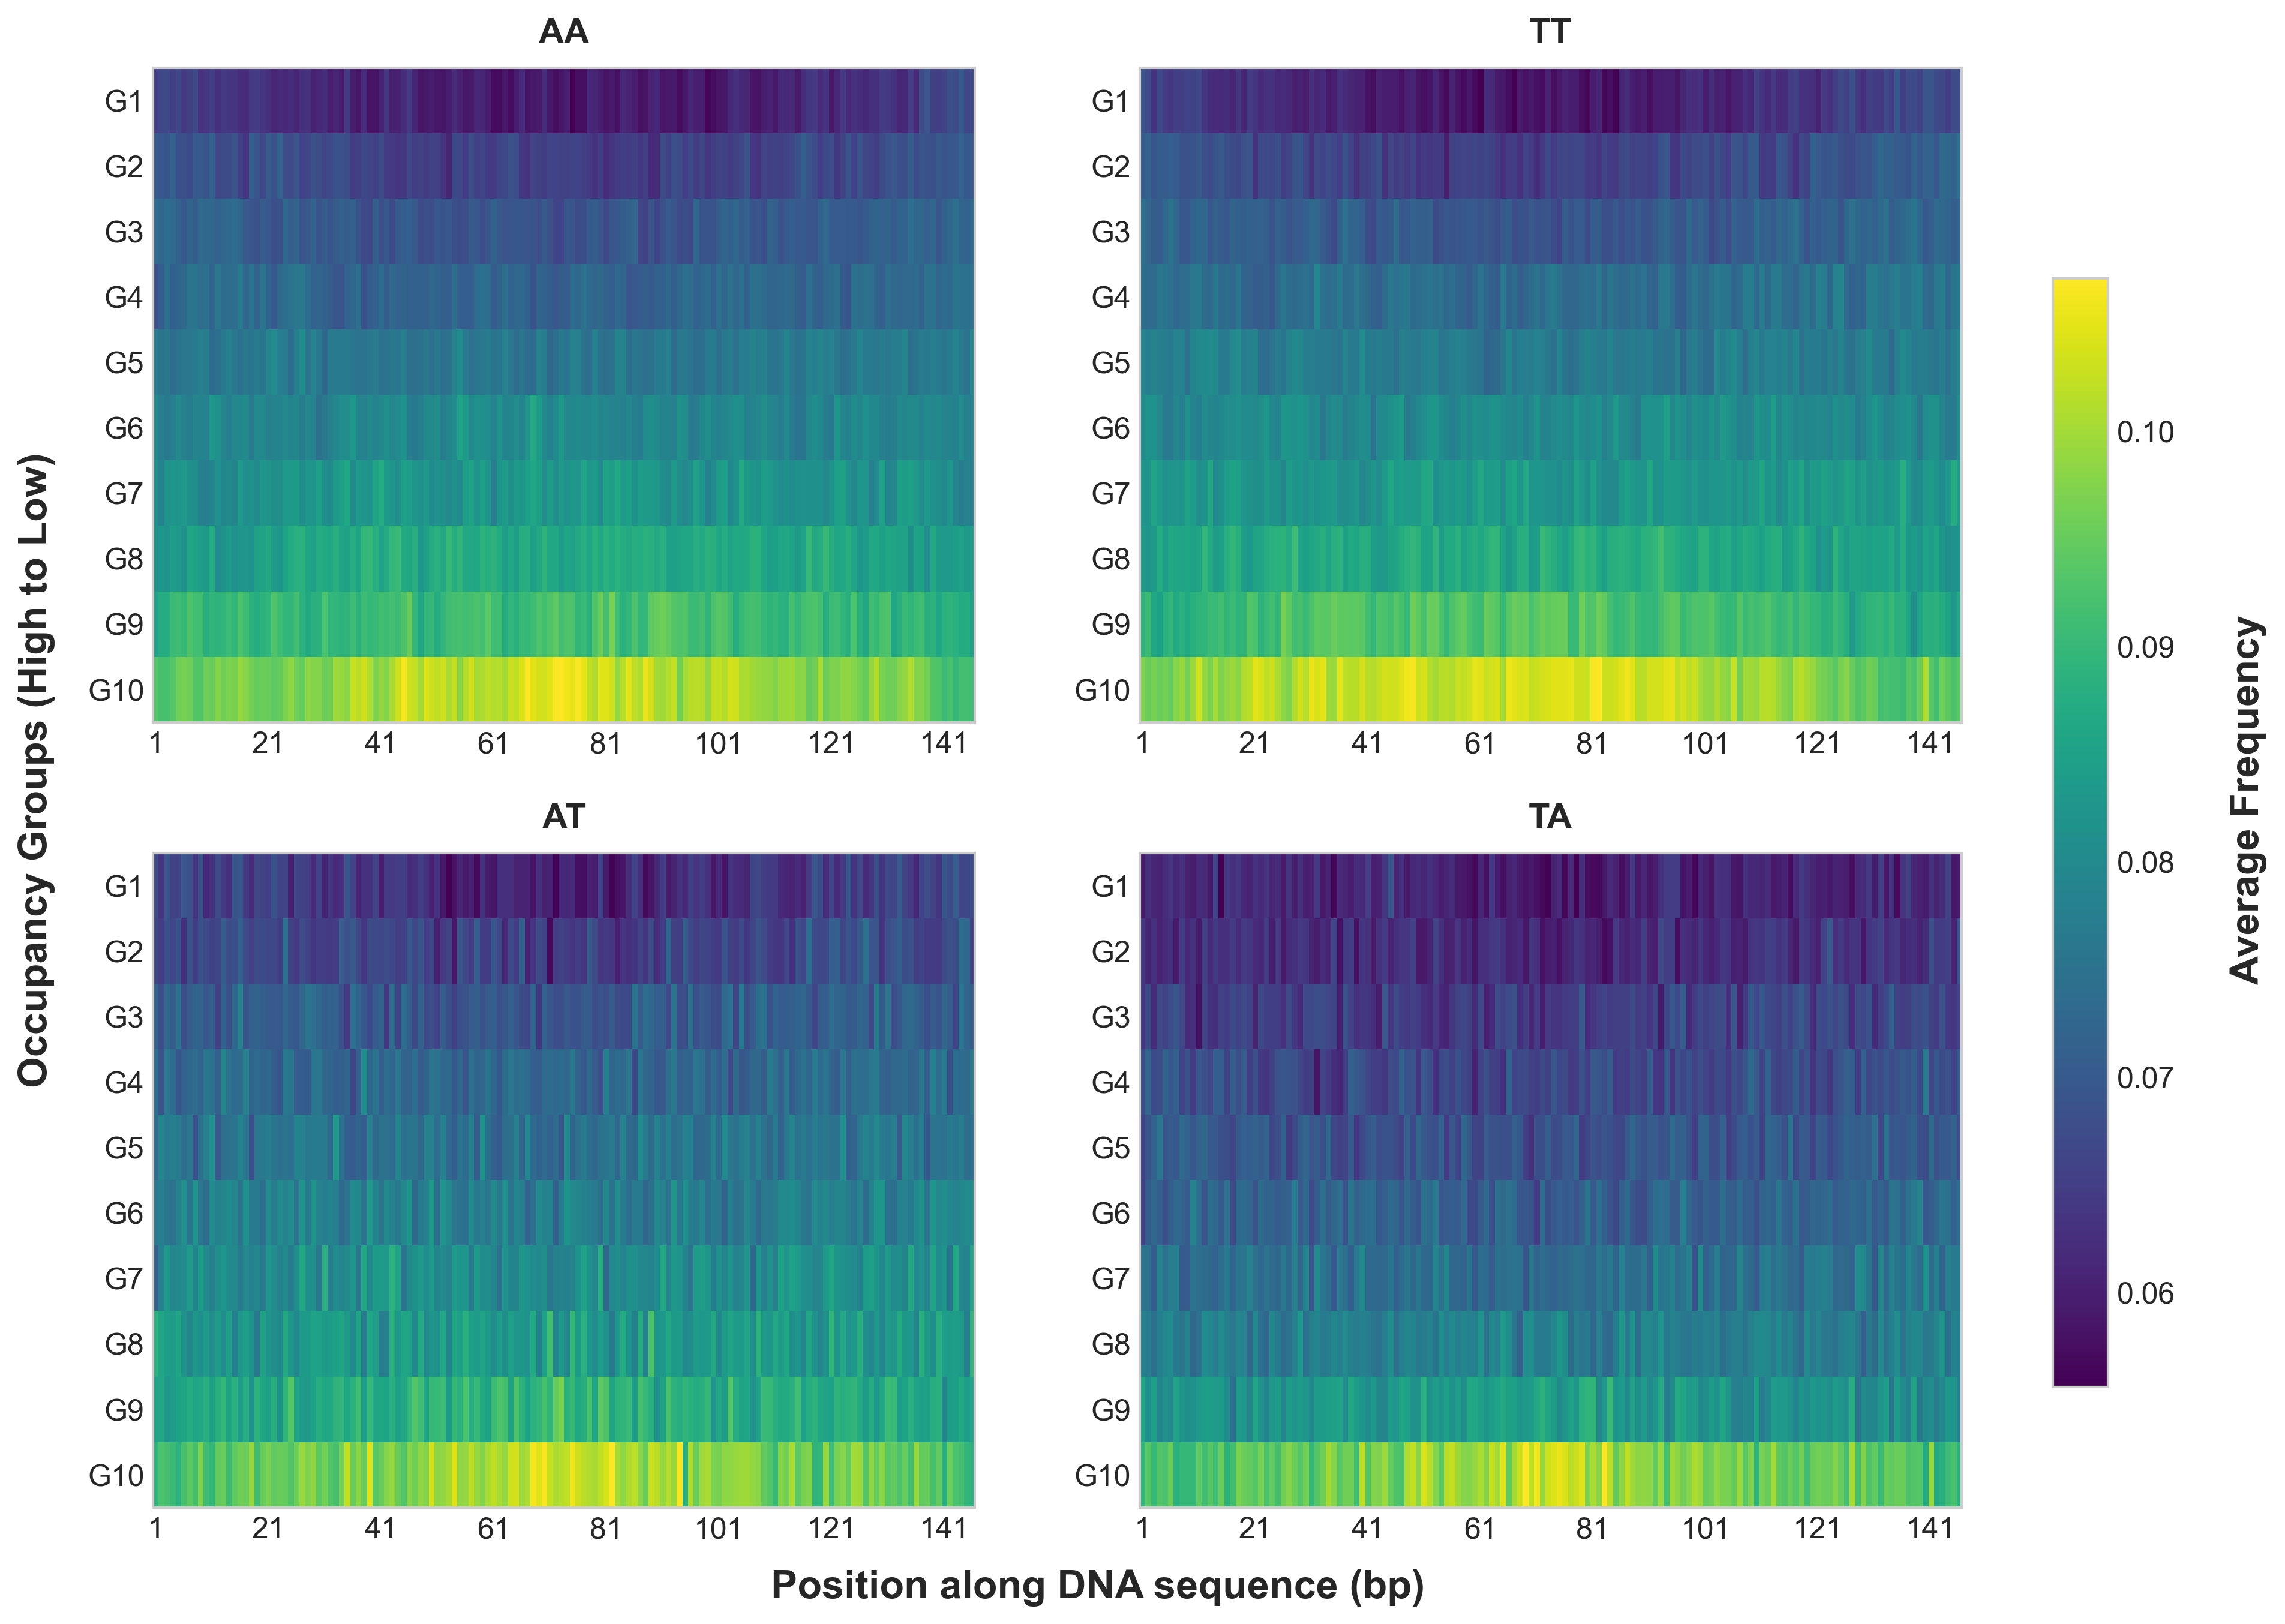

In [4]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# 0. Set plotting parameters for journal publication
# ==========================
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': 'Arial',
    'font.size': 16,
    'axes.titlesize': 14,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 16,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.format': 'pdf',
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1})

# ==========================
# 1. Data loading and processing
# ==========================
def load_h5_data(file_path):
    with h5py.File(file_path, 'r') as f:
        occupancy_rates = f['label'][:]
        matrices = f['Nuar'][:]
    return occupancy_rates, matrices

file_path = "Nucleosome Digital Matrix/Digital Matrix.h5"
occupancy_rates, matrices = load_h5_data(file_path)

# Extract the digital matrix for each base pair
base_pairs = {'AA': 0,'TT': 15,'AT': 3,'TA': 12}

# Process data for each base pair
processed_data = {}
for bp, idx in base_pairs.items():
    bp_matrices = matrices[:, idx, :]
    sorted_indices = np.argsort(occupancy_rates)[::-1]
    sorted_bp_matrices = bp_matrices[sorted_indices]
    
    num_groups = 10
    group_size = len(sorted_bp_matrices) // num_groups
    groups = []
    for i in range(num_groups):
        start = i * group_size
        end = start + group_size if i < num_groups - 1 else len(sorted_bp_matrices)
        groups.append(sorted_bp_matrices[start:end])
    
    average_matrices = [np.mean(group, axis=0) for group in groups]
    processed_data[bp] = average_matrices

# ==========================
# 2. Visualization and saving (optimized version)
# ==========================
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Global font settings
label_font = {'fontsize': 16,'fontweight': 'bold','fontfamily': 'Arial'}

# Plot heatmap for each base pair
for i, (bp, average_matrices) in enumerate(processed_data.items()):
    ax = axs[i//2, i%2]
    im = ax.imshow(average_matrices, cmap='viridis', aspect='auto', interpolation='nearest')
    
    # Axis settings
    ax.set_yticks(range(10))
    ax.set_yticklabels([f"G{j+1}" for j in range(10)], fontsize=12)
    ax.set_xticks(np.arange(0, 146, 20))
    ax.set_xticklabels(np.arange(1, 147, 20), fontsize=12)
    
    # Hide subplot labels
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # Title style
    ax.grid(False)
    ax.set_title(f"{bp}", fontdict={'fontsize': 14, 'fontweight': 'bold'}, pad=10)

# ==========================
# Global label settings
# ==========================
# Add a unified x-axis label
fig.text(0.43, 0.07, "Position along DNA sequence (bp)", ha='center', **label_font)

# Add a unified y-axis label
fig.text(0.03, 0.53, "Occupancy Groups (High to Low)", va='center', rotation='vertical', **label_font)

# ==========================
# Color bar optimization
# ==========================
cbar = fig.colorbar(
    im, 
    ax=axs, 
    orientation='vertical', 
    shrink=0.8,
    aspect=20,
    pad=0.05)
cbar.set_label('Average Frequency', fontsize=16, fontweight='bold', labelpad=12)
cbar.ax.tick_params(labelsize=12)

# Adjust color bar label position
cbar.ax.yaxis.set_label_position("right")
cbar.ax.yaxis.set_label_coords(3.2, 0.53) 

# Fine-tune layout
plt.subplots_adjust(left=0.08,right=0.75,bottom=0.12,top=0.92)

# Save the figure
plt.savefig("Visualization Charts/A-T-occupancy_groups_heatmaps.png", dpi=300)
plt.show()

In [ ]:
Extract data for specific base pairs (such as CC,GG,CG,GC) from the nucleosome occupancy numerical matrix,
divide these data into 10 groups based on occupancy rates, calculate the average frequency matrix for each group, 
and finally visualize these matrices in the form of heatmaps.

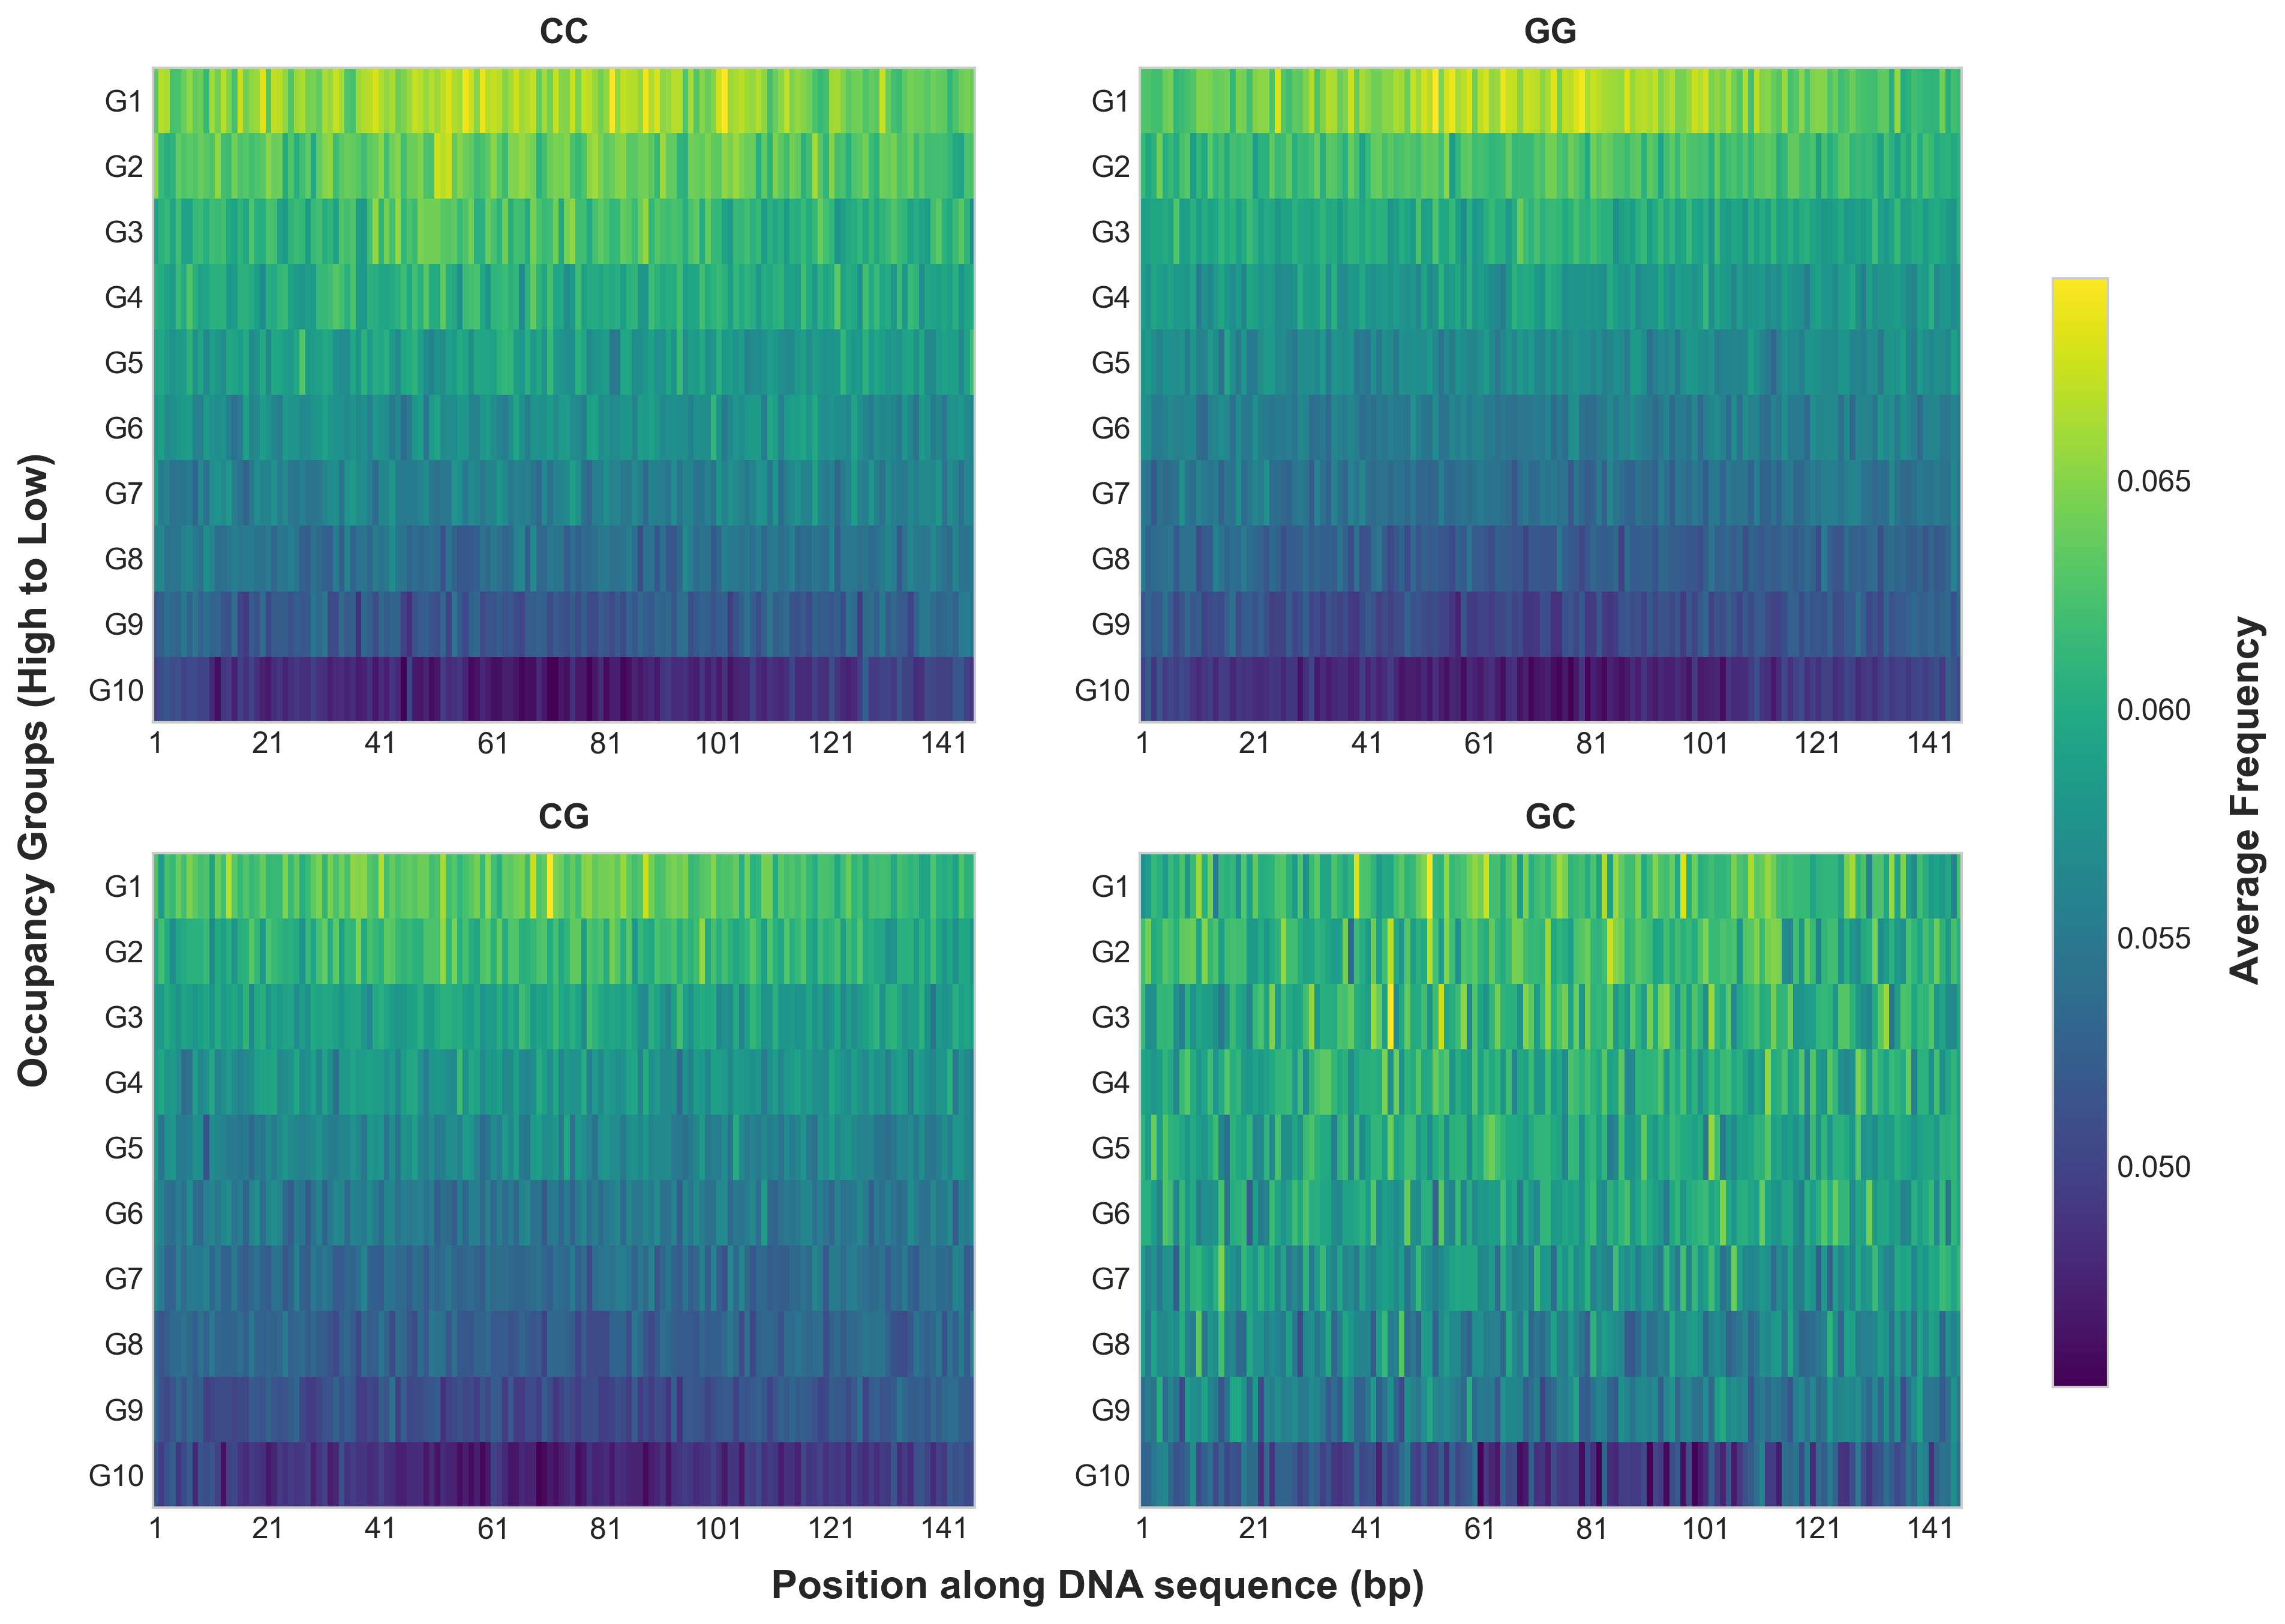

In [5]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# 0. Set plotting parameters for journal publication
# ==========================
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': 'Arial',
    'font.size': 16,
    'axes.titlesize': 14,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 16,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.format': 'pdf',
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1})

# ==========================
# 1. Data loading and processing
# ==========================
def load_h5_data(file_path):
    with h5py.File(file_path, 'r') as f:
        occupancy_rates = f['label'][:]
        matrices = f['Nuar'][:]
    return occupancy_rates, matrices

file_path = r"Nucleosome Digital Matrix/Digital Matrix.h5"
occupancy_rates, matrices = load_h5_data(file_path)

# Extract the digital matrix for each base pair
base_pairs = {'CC': 5,'GG': 9,'CG': 6,'GC': 7}

# Process data for each base pair
processed_data = {}
for bp, idx in base_pairs.items():
    bp_matrices = matrices[:, idx, :]
    sorted_indices = np.argsort(occupancy_rates)[::-1]
    sorted_bp_matrices = bp_matrices[sorted_indices]
    
    num_groups = 10
    group_size = len(sorted_bp_matrices) // num_groups
    groups = []
    for i in range(num_groups):
        start = i * group_size
        end = start + group_size if i < num_groups - 1 else len(sorted_bp_matrices)
        groups.append(sorted_bp_matrices[start:end])
    
    average_matrices = [np.mean(group, axis=0) for group in groups]
    processed_data[bp] = average_matrices

# ==========================
# 2. Visualization and saving (optimized version)
# ==========================
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Global font settings
label_font = {'fontsize': 16,'fontweight': 'bold','fontfamily': 'Arial'}

# Plot heatmap for each base pair
for i, (bp, average_matrices) in enumerate(processed_data.items()):
    ax = axs[i//2, i%2]
    im = ax.imshow(average_matrices, cmap='viridis', aspect='auto', interpolation='nearest')
    
    # Axis settings
    ax.set_yticks(range(10))
    ax.set_yticklabels([f"G{j+1}" for j in range(10)], fontsize=12)
    ax.set_xticks(np.arange(0, 146, 20))
    ax.set_xticklabels(np.arange(1, 147, 20), fontsize=12)
    
    # Hide subplot labels
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # Title style
    ax.grid(False)
    ax.set_title(f"{bp}", fontdict={'fontsize': 14, 'fontweight': 'bold'}, pad=10)

# Add a unified x-axis label
fig.text(0.43, 0.07, "Position along DNA sequence (bp)", ha='center', **label_font)

# Add a unified y-axis label
fig.text(0.03, 0.53,  "Occupancy Groups (High to Low)", va='center', rotation='vertical',**label_font)

# Color bar optimization
cbar = fig.colorbar(
    im, 
    ax=axs, 
    orientation='vertical', 
    shrink=0.8,
    aspect=20,
    pad=0.05)
cbar.set_label('Average Frequency', fontsize=16, fontweight='bold', labelpad=12)
cbar.ax.tick_params(labelsize=12)

# Adjust color bar label position
cbar.ax.yaxis.set_label_position("right")
cbar.ax.yaxis.set_label_coords(3.2, 0.53) 

# Fine-tune layout
plt.subplots_adjust(left=0.08,right=0.75,  bottom=0.12,top=0.92)

# Save the figure with a new filename
plt.savefig("Visualization Charts/C-G-occupancy_groups_heatmaps.png", dpi=300)
plt.show()

In [ ]:
Extract data for specific base pairs (such as AC,AG,CA,GA) from the nucleosome occupancy numerical matrix,
divide these data into 10 groups based on occupancy rates, calculate the average frequency matrix for each group, 
and finally visualize these matrices in the form of heatmaps.

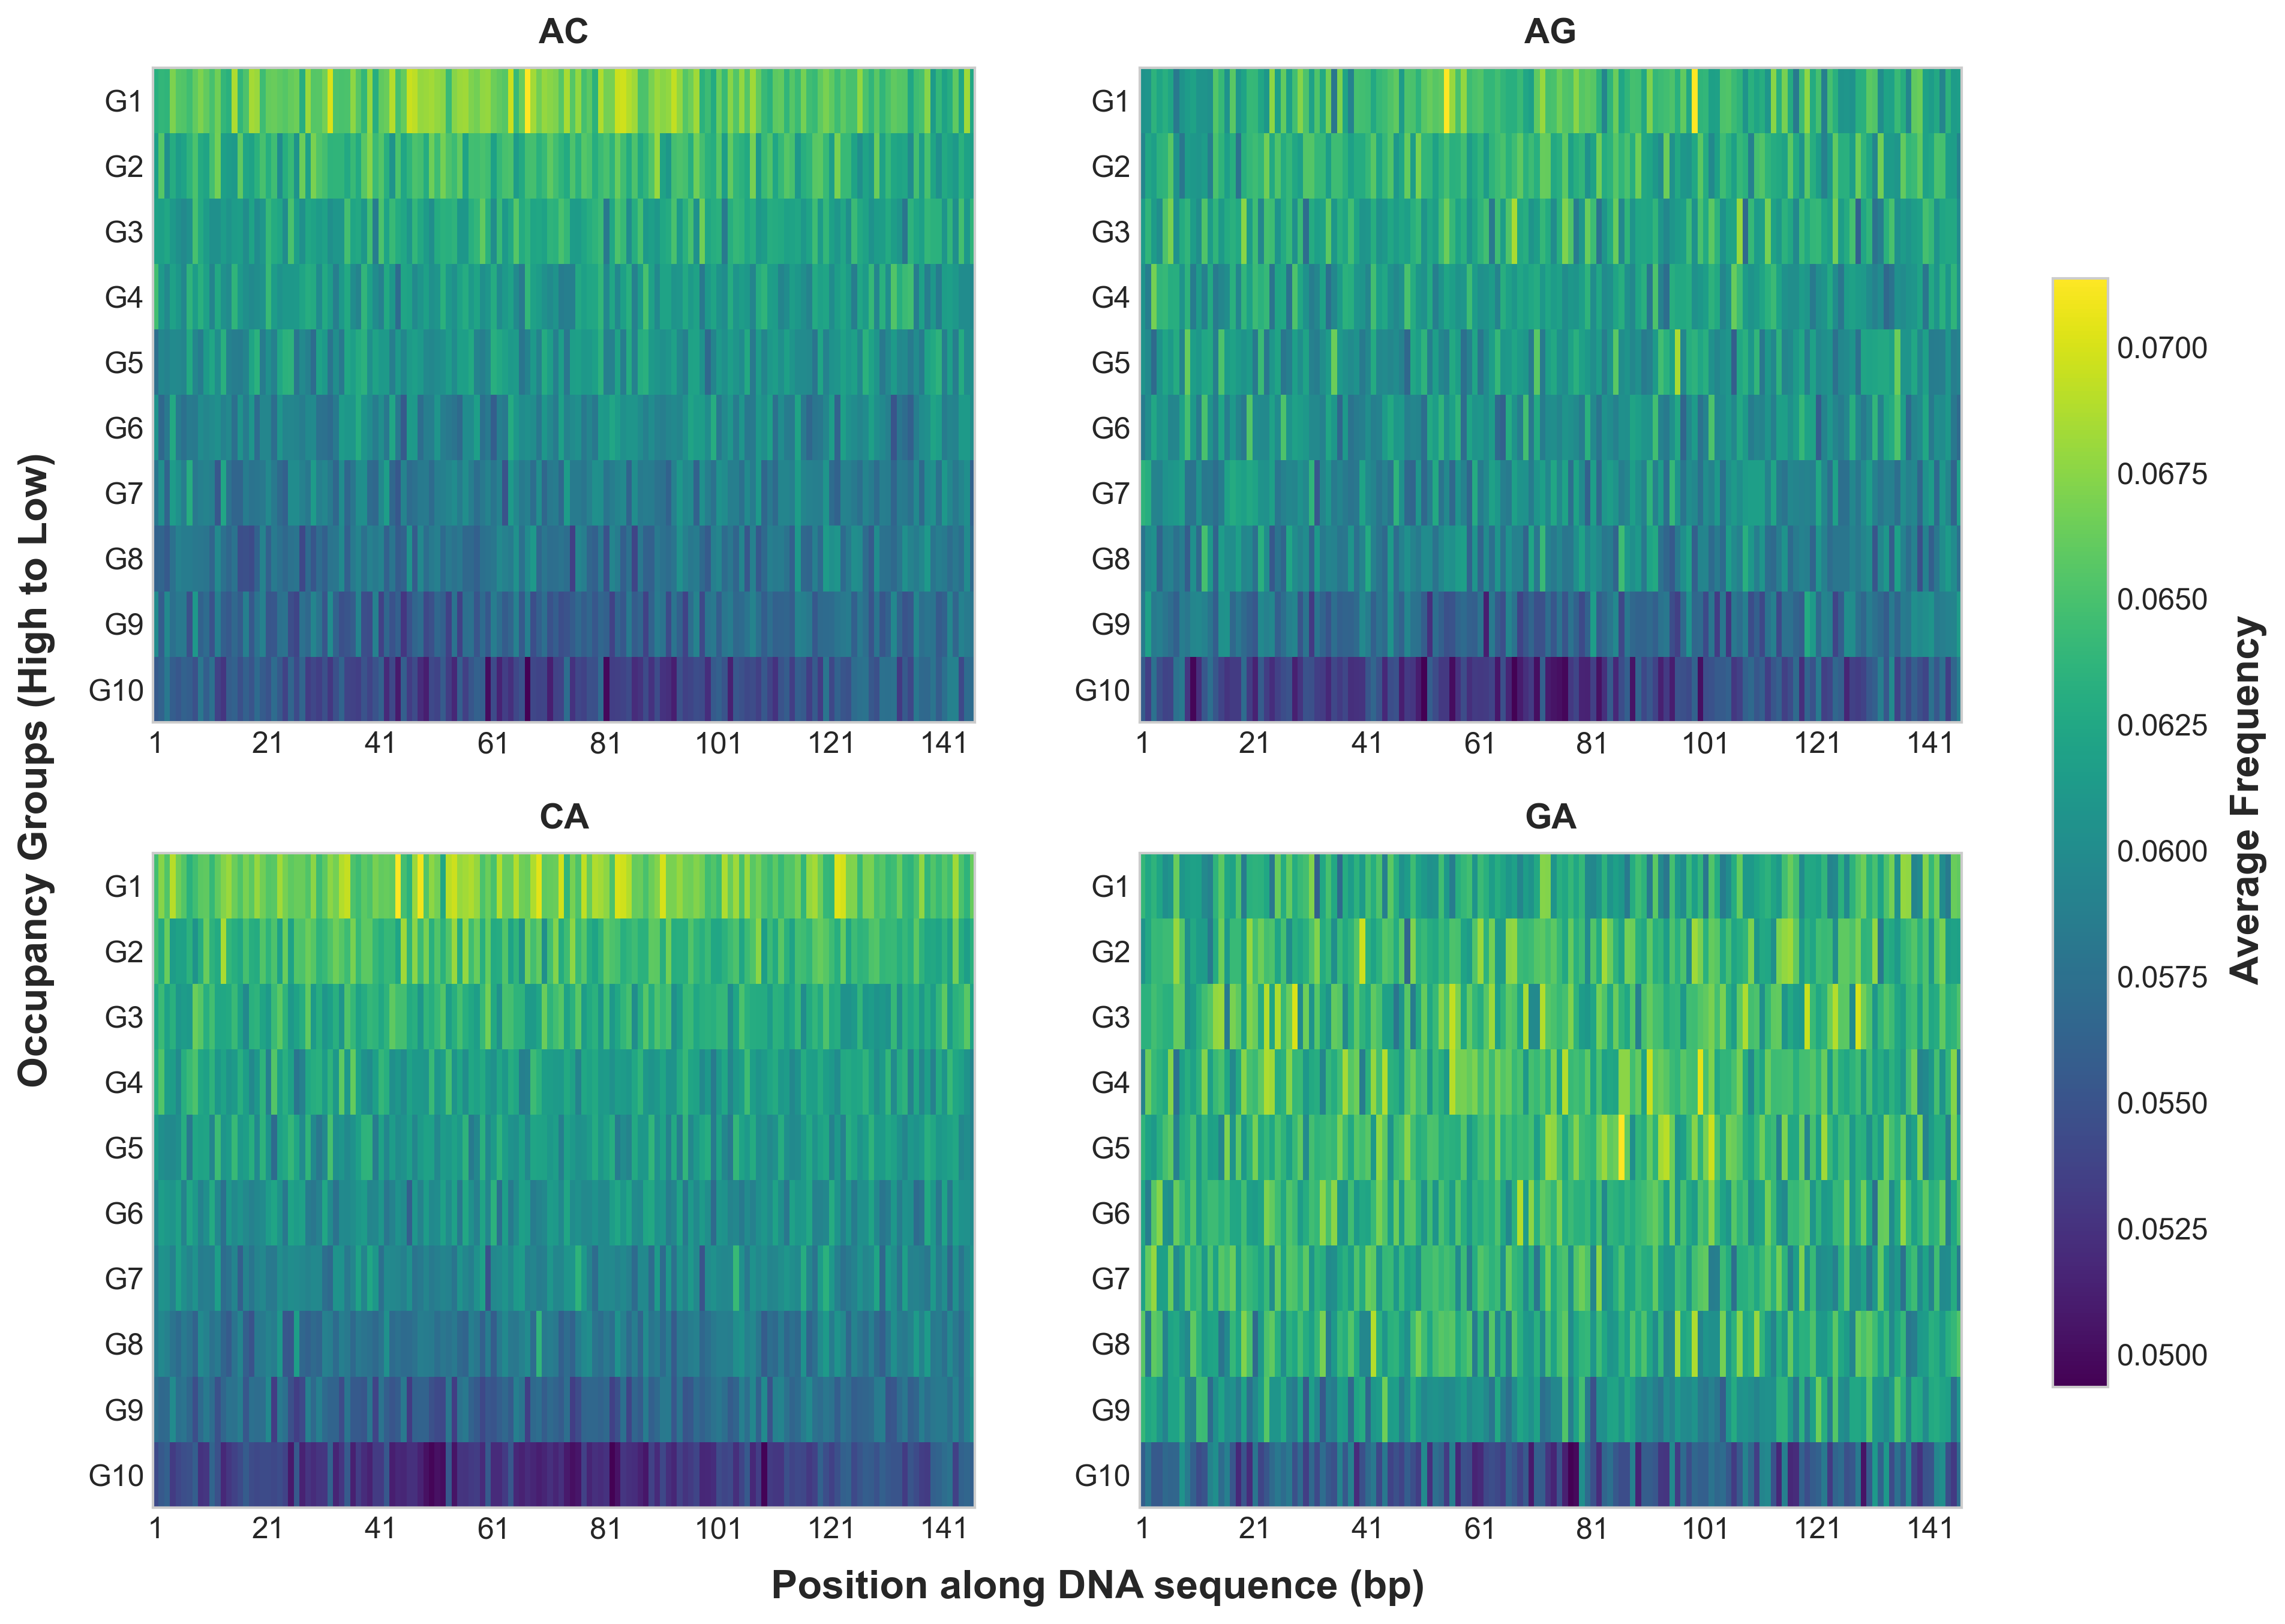

In [6]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# 0. Set plotting parameters for journal publication
# ==========================
plt.style.use('seaborn-v0_8-whitegrid')  
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': 'Arial',
    'font.size': 16,
    'axes.titlesize': 14,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 16,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.format': 'pdf',
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1})

# ==========================
# 1. Data loading and processing
# ==========================
def load_h5_data(file_path):
    with h5py.File(file_path, 'r') as f:
        occupancy_rates = f['label'][:]
        matrices = f['Nuar'][:]
    return occupancy_rates, matrices

file_path = r"nucleosome Digital Matrix/Digital Matrix.h5"
occupancy_rates, matrices = load_h5_data(file_path)

# Extract the digital matrix for each base pair
base_pairs = {'AC': 1,'AG': 2,'CA': 4,'GA': 8}

# Process data for each base pair
processed_data = {}
for bp, idx in base_pairs.items():
    bp_matrices = matrices[:, idx, :]
    sorted_indices = np.argsort(occupancy_rates)[::-1]
    sorted_bp_matrices = bp_matrices[sorted_indices]
    
    num_groups = 10
    group_size = len(sorted_bp_matrices) // num_groups
    groups = []
    for i in range(num_groups):
        start = i * group_size
        end = start + group_size if i < num_groups - 1 else len(sorted_bp_matrices)
        groups.append(sorted_bp_matrices[start:end])
    
    average_matrices = [np.mean(group, axis=0) for group in groups]
    processed_data[bp] = average_matrices

# ==========================
# 2. Visualization and saving (optimized version)
# ==========================
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Global font settings
label_font = {'fontsize': 16,'fontweight': 'bold','fontfamily': 'Arial'}

# Plot heatmap for each base pair
for i, (bp, average_matrices) in enumerate(processed_data.items()):
    ax = axs[i//2, i%2]
    im = ax.imshow(average_matrices, cmap='viridis', aspect='auto', interpolation='nearest')
    
    # Axis settings
    ax.set_yticks(range(10))
    ax.set_yticklabels([f"G{j+1}" for j in range(10)], fontsize=12)
    ax.set_xticks(np.arange(0, 146, 20))
    ax.set_xticklabels(np.arange(1, 147, 20), fontsize=12)
    
    # Hide subplot labels
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # Title style
    ax.grid(False)
    ax.set_title(f"{bp}", fontdict={'fontsize': 14, 'fontweight': 'bold'}, pad=10)

# Add a unified x-axis label
fig.text(0.43, 0.07, 
         "Position along DNA sequence (bp)", 
         ha='center', 
         **label_font)

# Add a unified y-axis label
fig.text(0.03, 0.53, 
         "Occupancy Groups (High to Low)", 
         va='center', 
         rotation='vertical', 
         **label_font)

# Color bar optimization
cbar = fig.colorbar(
    im, 
    ax=axs, 
    orientation='vertical', 
    shrink=0.8,
    aspect=20,
    pad=0.05)
cbar.set_label('Average Frequency', fontsize=16, fontweight='bold', labelpad=12)
cbar.ax.tick_params(labelsize=12)

# Adjust color bar label position
cbar.ax.yaxis.set_label_position("right")
cbar.ax.yaxis.set_label_coords(3.2, 0.53) 

# Fine-tune layout
plt.subplots_adjust(left=0.08,   right=0.75,  bottom=0.12, top=0.92 )

# Save the figure
plt.savefig("Visualization Charts/A-C-G-occupancy_groups_heatmaps.png", dpi=300)
plt.show()

In [ ]:
Extract data for specific base pairs (such as CT,TC,GT,TG ) from the nucleosome occupancy numerical matrix,
divide these data into 10 groups based on occupancy rates, calculate the average frequency matrix for each group, 
and finally visualize these matrices in the form of heatmaps.

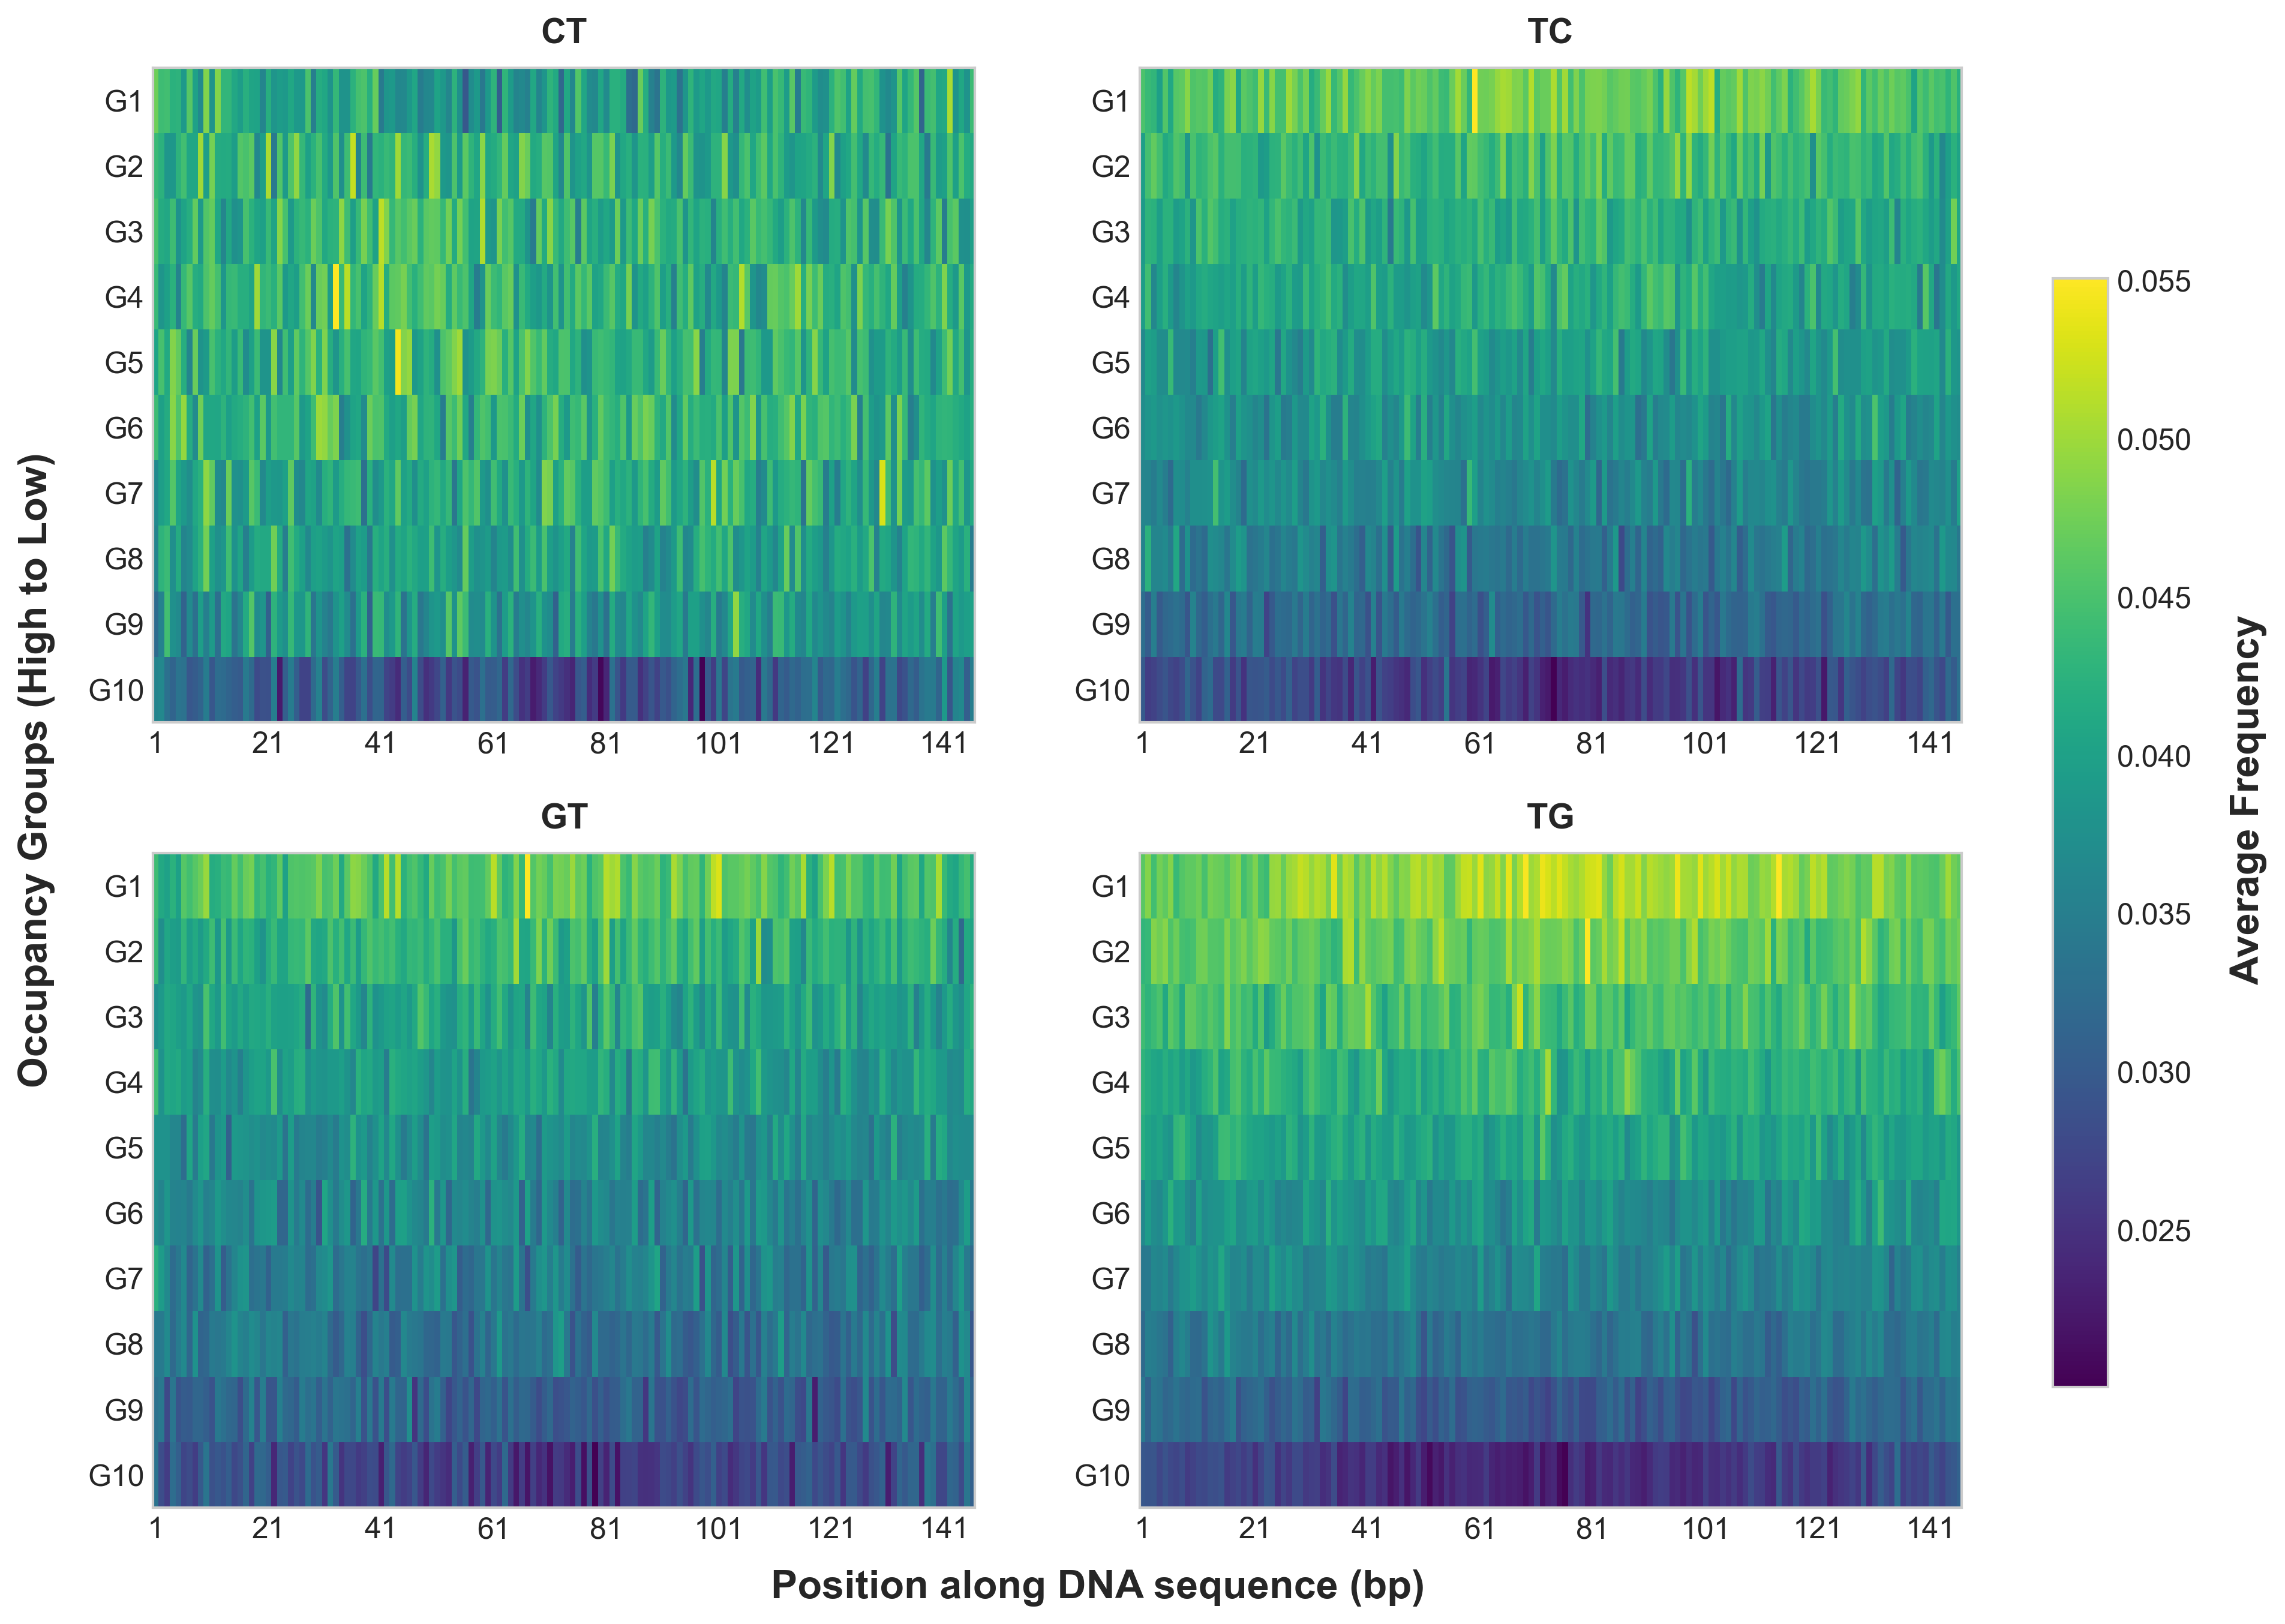

In [7]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# 0. Set plotting parameters for journal publication
# ==========================
plt.style.use('seaborn-v0_8-whitegrid')  
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': 'Arial',
    'font.size': 16,
    'axes.titlesize': 14,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 16,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.format': 'pdf',
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1})

# ==========================
# 1. Data loading and processing
# ==========================
def load_h5_data(file_path):
    with h5py.File(file_path, 'r') as f:
        occupancy_rates = f['label'][:]
        matrices = f['Nuar'][:]
    return occupancy_rates, matrices

file_path = r"nucleosome Digital Matrix/Digital Matrix.h5"
occupancy_rates, matrices = load_h5_data(file_path)

# Extract the digital matrix for each base pair
base_pairs = {'CT': 13,'TC': 14,'GT': 11,'TG': 10}

# Process data for each base pair
processed_data = {}
for bp, idx in base_pairs.items():
    bp_matrices = matrices[:, idx, :]
    sorted_indices = np.argsort(occupancy_rates)[::-1]
    sorted_bp_matrices = bp_matrices[sorted_indices]
    
    num_groups = 10
    group_size = len(sorted_bp_matrices) // num_groups
    groups = []
    for i in range(num_groups):
        start = i * group_size
        end = start + group_size if i < num_groups - 1 else len(sorted_bp_matrices)
        groups.append(sorted_bp_matrices[start:end])
    
    average_matrices = [np.mean(group, axis=0) for group in groups]
    processed_data[bp] = average_matrices

# ==========================
# 2. Visualization and saving (optimized version)
# ==========================
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Global font settings
label_font = {'fontsize': 16,'fontweight': 'bold','fontfamily': 'Arial'}

# Plot heatmap for each base pair
for i, (bp, average_matrices) in enumerate(processed_data.items()):
    ax = axs[i//2, i%2]
    im = ax.imshow(average_matrices, cmap='viridis', aspect='auto', interpolation='nearest')
    
    # Axis settings
    ax.set_yticks(range(10))
    ax.set_yticklabels([f"G{j+1}" for j in range(10)], fontsize=12)
    ax.set_xticks(np.arange(0, 146, 20))
    ax.set_xticklabels(np.arange(1, 147, 20), fontsize=12)
    
    # Hide subplot labels
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # Title style
    ax.grid(False)
    ax.set_title(f"{bp}", fontdict={'fontsize': 14, 'fontweight': 'bold'}, pad=10)

# Add a unified x-axis label
fig.text(0.43, 0.07, 
         "Position along DNA sequence (bp)", 
         ha='center', 
         **label_font)

# Add a unified y-axis label
fig.text(0.03, 0.53, 
         "Occupancy Groups (High to Low)", 
         va='center', 
         rotation='vertical', 
         **label_font)

# Color bar optimization
cbar = fig.colorbar(
    im, 
    ax=axs, 
    orientation='vertical', 
    shrink=0.8,
    aspect=20,
    pad=0.05)
cbar.set_label('Average Frequency', fontsize=16, fontweight='bold', labelpad=12)
cbar.ax.tick_params(labelsize=12)

# Adjust color bar label position
cbar.ax.yaxis.set_label_position("right")
cbar.ax.yaxis.set_label_coords(3.2, 0.53)  

# Fine-tune layout
plt.subplots_adjust(left=0.08,   right=0.75,  bottom=0.12, top=0.92)

# Save the figure
plt.savefig("Visualization Charts/C-T-G-Goccupancy_groups_heatmaps.png", dpi=300)
plt.show()

In [ ]:
Extract data for the 16 types of dinucleotide base pairs from the nucleosome occupancy numerical matrix, 
divide these data into 10 groups based on occupancy rates, calculate the average frequency matrix for each group, 
and visualize these matrices in the form of heatmaps.

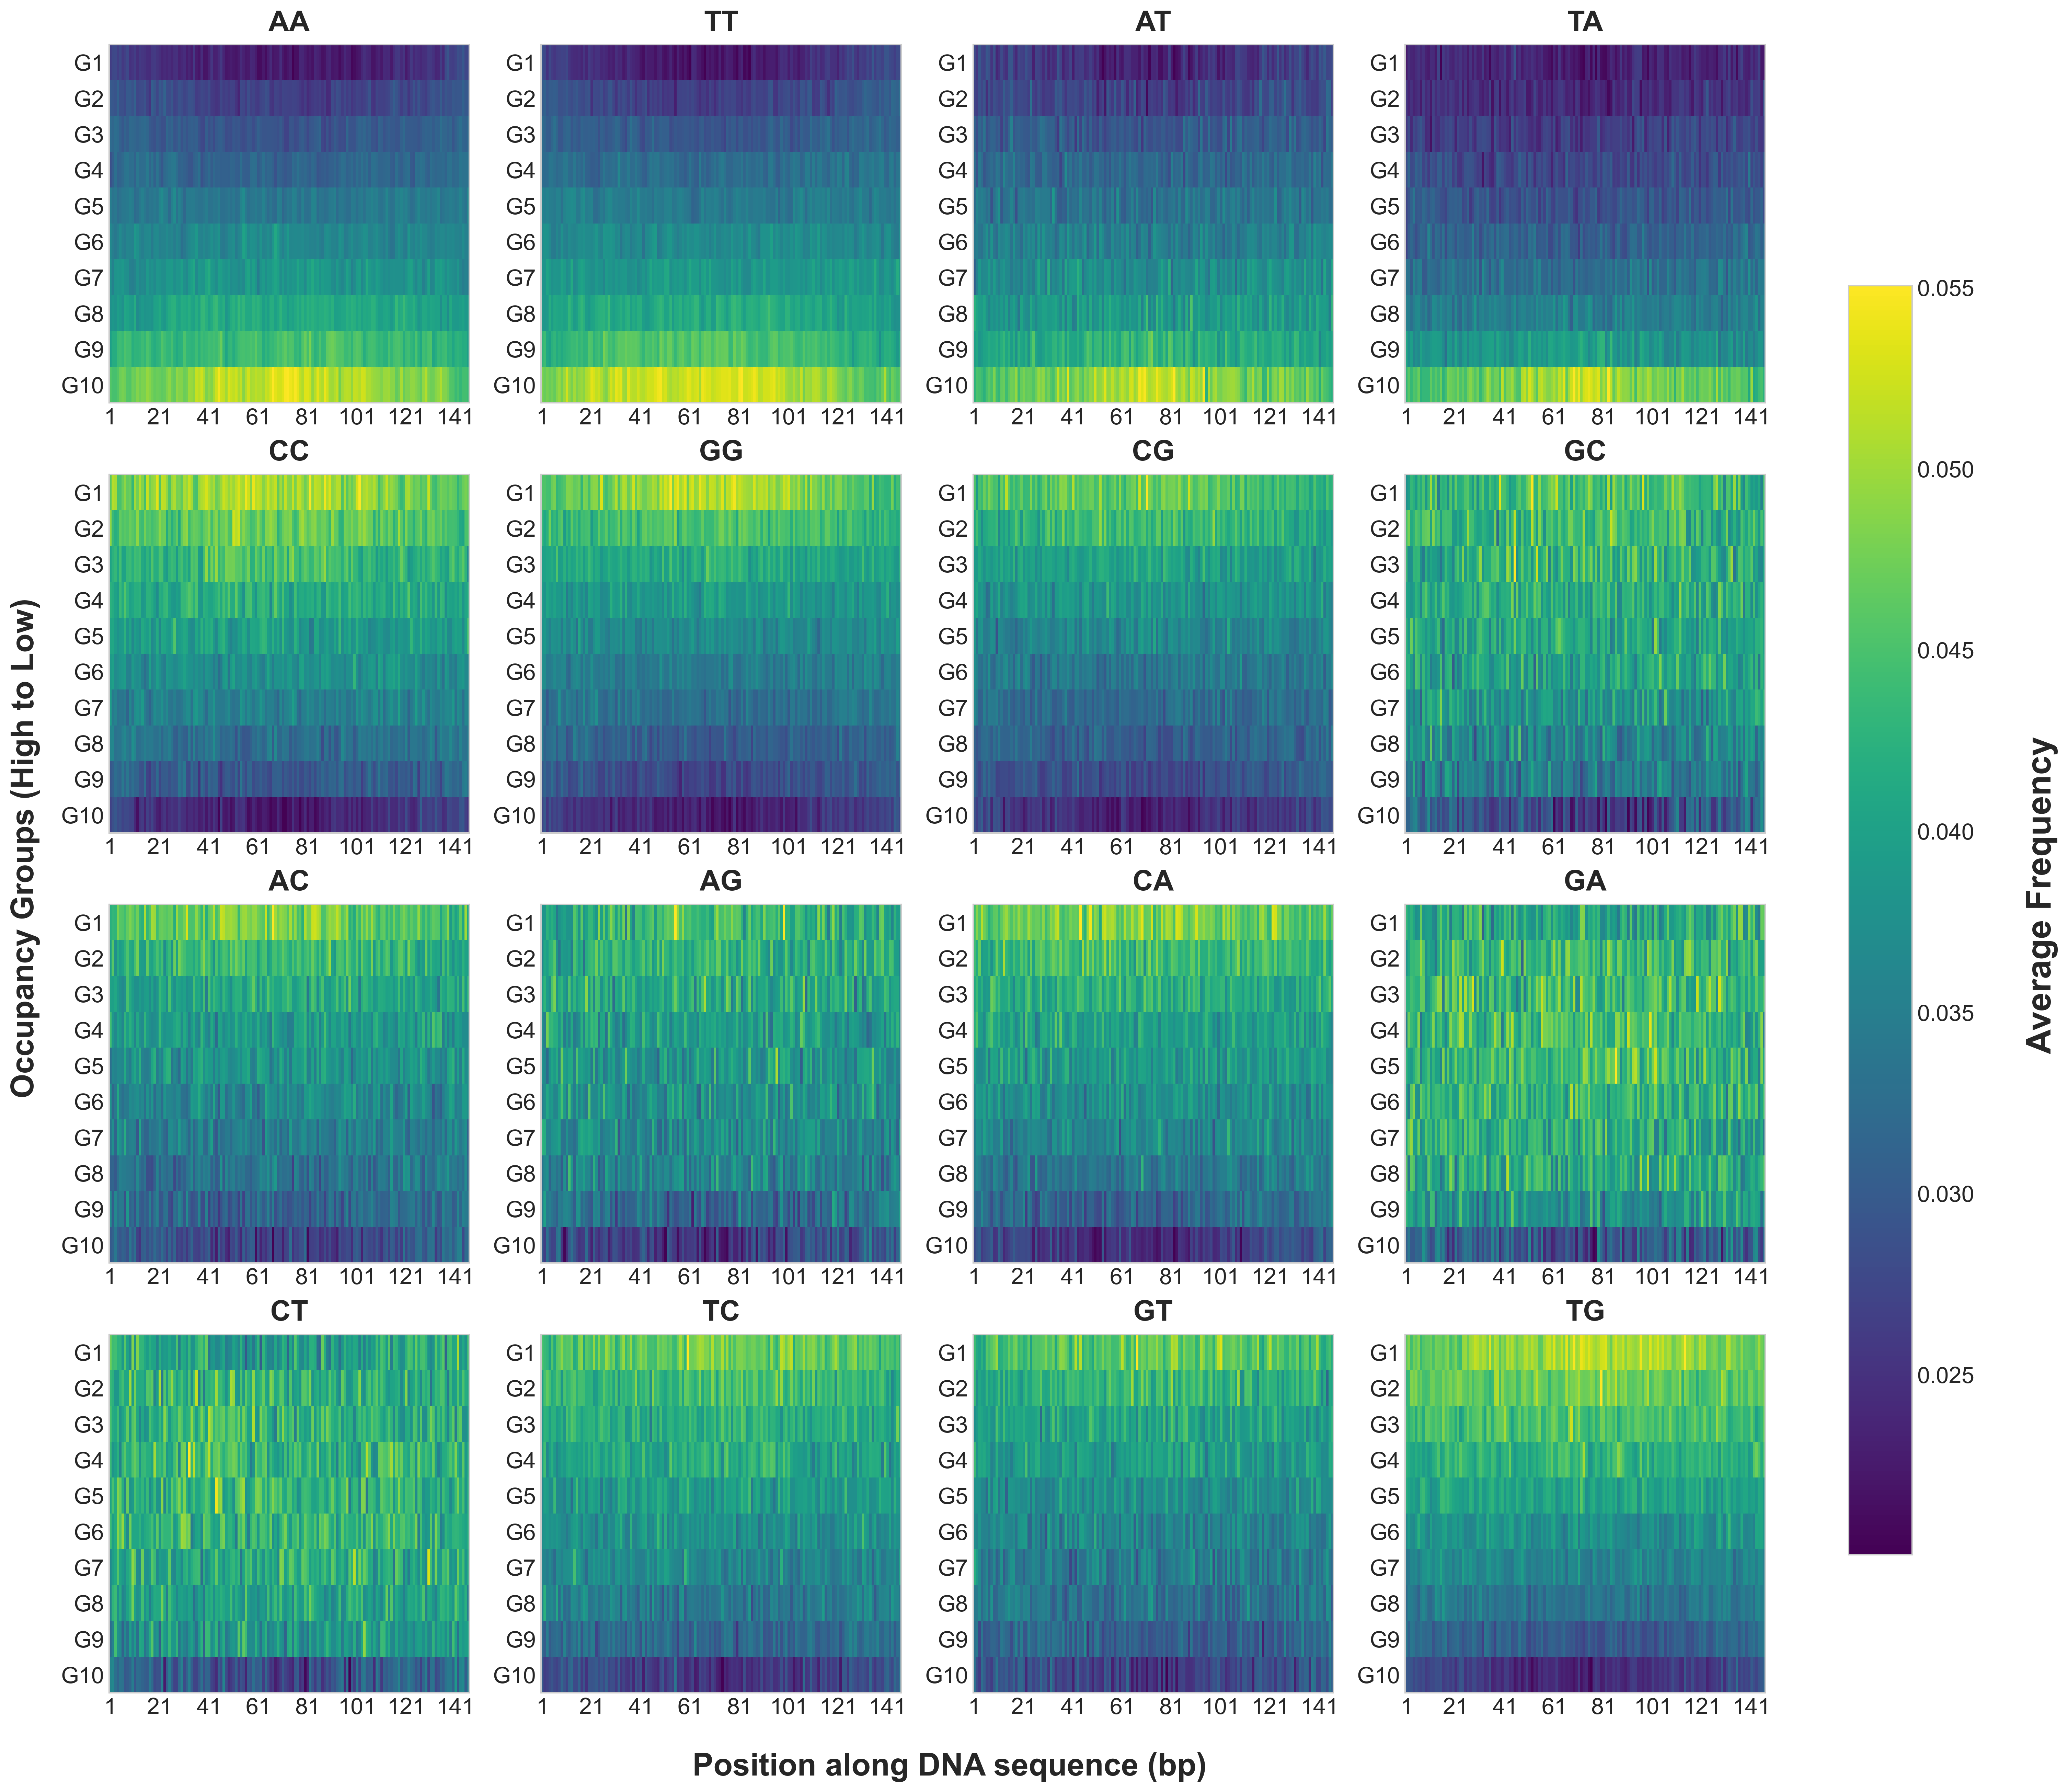

In [8]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# 0. Set plotting parameters for journal publication
# ==========================
plt.style.use('seaborn-v0_8-whitegrid')  
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': 'Arial',
    'font.size': 18,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.format': 'pdf',
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1})

# ==========================
# 1. Data loading and processing
# ==========================
def load_h5_data(file_path):
    with h5py.File(file_path, 'r') as f:
        occupancy_rates = f['label'][:]
        matrices = f['Nuar'][:]
    return occupancy_rates, matrices

file_path = r"nucleosome Digital Matrix/Digital Matrix.h5"
occupancy_rates, matrices = load_h5_data(file_path)

# Define dictionaries for all base pairs
base_pairs_list = [
    {'AA': 0, 'TT': 15, 'AT': 3, 'TA': 12},
    {'CC': 5, 'GG': 9, 'CG': 6, 'GC': 7},
    {'AC': 1, 'AG': 2, 'CA': 4, 'GA': 8},
    {'CT': 13, 'TC': 14, 'GT': 11, 'TG': 10}]

# Process data for each base pair
all_processed_data = []
for base_pairs in base_pairs_list:
    processed_data = {}
    for bp, idx in base_pairs.items():
        bp_matrices = matrices[:, idx, :]
        sorted_indices = np.argsort(occupancy_rates)[::-1]
        sorted_bp_matrices = bp_matrices[sorted_indices]
        
        num_groups = 10
        group_size = len(sorted_bp_matrices) // num_groups
        groups = []
        for i in range(num_groups):
            start = i * group_size
            end = start + group_size if i < num_groups - 1 else len(sorted_bp_matrices)
            groups.append(sorted_bp_matrices[start:end])
        
        average_matrices = [np.mean(group, axis=0) for group in groups]
        processed_data[bp] = average_matrices
    all_processed_data.append(processed_data)

# ==========================
# 2. Visualization and saving (optimized version)
# ==========================
fig, axs = plt.subplots(4, 4, figsize=(24, 20))

# Global font settings
label_font = {'fontsize': 22,'fontweight': 'bold','fontfamily': 'Arial'}

# Plot heatmap for each base pair
for fig_idx, processed_data in enumerate(all_processed_data):
    for i, (bp, average_matrices) in enumerate(processed_data.items()):
        ax = axs[fig_idx, i]
        im = ax.imshow(average_matrices, cmap='viridis', aspect='auto', interpolation='nearest')
        
        # Axis settings
        ax.set_yticks(range(10))
        ax.set_yticklabels([f"G{j+1}" for j in range(10)], fontsize=16)
        ax.set_xticks(np.arange(0, 146, 20))
        ax.set_xticklabels(np.arange(1, 147, 20), fontsize=16)
        
        # Hide subplot labels
        ax.set_xlabel('')
        ax.set_ylabel('')
        
        # Title style
        ax.grid(False)
        ax.set_title(f"{bp}", fontdict={'fontsize': 20, 'fontweight': 'bold'}, pad=10)

# Add a unified x-axis label
fig.text(0.42, 0.08, 
         "Position along DNA sequence (bp)", 
         ha='center', 
         **label_font)

# Add a unified y-axis label
fig.text(0.04, 0.53, 
         "Occupancy Groups (High to Low)", 
         va='center', 
         rotation='vertical', 
         **label_font)

# Color bar optimization
cbar = fig.colorbar(
    im, 
    ax=axs, 
    orientation='vertical', 
    shrink=0.8,
    aspect=20,
    pad=0.05)
cbar.set_label('Average Frequency', fontsize=24, fontweight='bold', labelpad=16)
cbar.ax.tick_params(labelsize=16)

# Adjust color bar label position
cbar.ax.yaxis.set_label_position("right")
cbar.ax.yaxis.set_label_coords(2.8, 0.52)  

# Fine-tune layout
plt.subplots_adjust(left=0.08, right=0.75, bottom=0.12, top=0.92)

# Save the figure
plt.savefig("Visualization Charts/sixteen_base_pairs_occupancy_groups_heatmaps.png", dpi=300)
plt.show()